In [1]:
import tensorflow as tf
import h5py
import numpy as np
from numpy import newaxis
import cv2
import sys
import os
from osgeo import gdal
from image_utils import read_images,write_data_h5,read_labels
import matplotlib.pyplot as plt

/home/s161362/.conda/envs/env_dhi/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:


NAME_PANCHRO='panchro.tif'
NAME_PANSHARP='pansharp.tif'
NAME_MS='ms.tif'
NAME_LABELS='groundtruth.png'

WIDTH=120
STRIDE=120


In [3]:
def prepare_ms_hr(ms_lr,size_hr):
    '''
    Prepares the upsampled MS image 
    :ms_lr input image to upsample
    :size_hr to upsample the Low Resolution MS image to the dimension of the High Resolution panchromatic image
    '''
    ms_ph=tf.placeholder(tf.float64, [ms_lr.shape[0],ms_lr.shape[1],ms_lr.shape[2],ms_lr.shape[3]], name='ms_placeholder')
    ms_hr=tf.image.resize_images(ms_ph, [size_hr[0], size_hr[1]])
    ms_hr=tf.cast(ms_hr,tf.float64,name='cast_ms_hr')

    with tf.Session() as sess:
        ms_hr= sess.run(ms_hr,feed_dict={ms_ph: ms_lr})
        return ms_hr

In [4]:
def extract_patches(data,width,stride,path_out):
    '''
    Extract patches from images 
    :data input image 
    :width dimensiton of the patch
    :stride stride of patch selection on the image
    '''
    print('Patch extraction with stride=%d and width=%d begins for: %s'%(stride,width,path_out) )
    data_pl=tf.placeholder(tf.float64, [data.shape[0],data.shape[1],data.shape[2],data.shape[3]], name='data_placeholder')
    data_o=tf.extract_image_patches(images=data_pl,ksizes=[1,width,width,1],strides=[1,stride,stride,1],rates=[1,1,1,1],padding='VALID')
    print('Patch extraction done')
    size_tot=data_o.get_shape().as_list()
    data_o=tf.reshape(data_o,[size_tot[1]*size_tot[2],width,width,data.shape[3]])
    with tf.Session() as sess:
        Data_o= sess.run(data_o,feed_dict={data_pl: data})
        print('%d patches of size %d x %d created as list for %s'%(Data_o.shape[0],Data_o.shape[1],Data_o.shape[2],path_out))
        return Data_o
    

In [5]:
def save_patches(data,path_out):
    '''
    Write the patches list to .h5 file format
    :data patches list
    :path_out where to save the patches
    '''
    write_data_h5(path_out,data)


 PANCHROMATIC 


Patch extraction with stride=120 and width=120 begins for: ../DATA_GHANA/RAW_PATCHES/120_x_120/panchro.h5
Patch extraction done
9944 patches of size 120 x 120 created as list for ../DATA_GHANA/RAW_PATCHES/120_x_120/panchro.h5
Original size of the dataset is 9944
Final size of the dataset is 7747
File../DATA_GHANA/RAW_PATCHES/120_x_120/panchro.h5 created


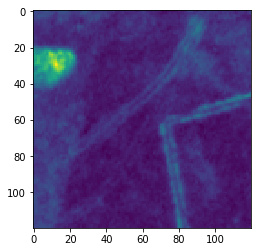


 MS BANDS



 Band 0 

Upscale
Patch extraction with stride=120 and width=120 begins for: ../DATA_GHANA/RAW_PATCHES/120_x_120/ms_hr_0.h5
Patch extraction done
9944 patches of size 120 x 120 created as list for ../DATA_GHANA/RAW_PATCHES/120_x_120/ms_hr_0.h5
File../DATA_GHANA/RAW_PATCHES/120_x_120/ms_hr_0.h5 created


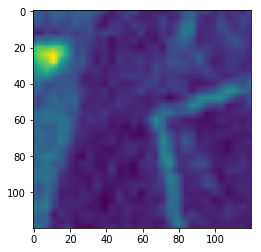


 Band 1 

Upscale
Patch extraction with stride=120 and width=120 begins for: ../DATA_GHANA/RAW_PATCHES/120_x_120/ms_hr_1.h5
Patch extraction done
9944 patches of size 120 x 120 created as list for ../DATA_GHANA/RAW_PATCHES/120_x_120/ms_hr_1.h5
File../DATA_GHANA/RAW_PATCHES/120_x_120/ms_hr_1.h5 created


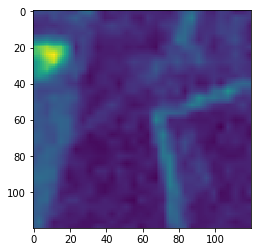


 Band 2 

Upscale
Patch extraction with stride=120 and width=120 begins for: ../DATA_GHANA/RAW_PATCHES/120_x_120/ms_hr_2.h5
Patch extraction done
9944 patches of size 120 x 120 created as list for ../DATA_GHANA/RAW_PATCHES/120_x_120/ms_hr_2.h5
File../DATA_GHANA/RAW_PATCHES/120_x_120/ms_hr_2.h5 created


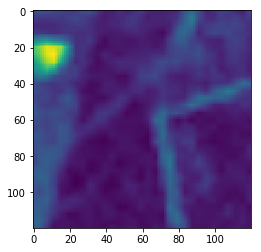


 Band 3 

Upscale
Patch extraction with stride=120 and width=120 begins for: ../DATA_GHANA/RAW_PATCHES/120_x_120/ms_hr_3.h5
Patch extraction done
9944 patches of size 120 x 120 created as list for ../DATA_GHANA/RAW_PATCHES/120_x_120/ms_hr_3.h5
File../DATA_GHANA/RAW_PATCHES/120_x_120/ms_hr_3.h5 created


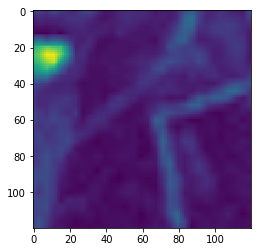


 Band 4 

Upscale
Patch extraction with stride=120 and width=120 begins for: ../DATA_GHANA/RAW_PATCHES/120_x_120/ms_hr_4.h5
Patch extraction done
9944 patches of size 120 x 120 created as list for ../DATA_GHANA/RAW_PATCHES/120_x_120/ms_hr_4.h5
File../DATA_GHANA/RAW_PATCHES/120_x_120/ms_hr_4.h5 created


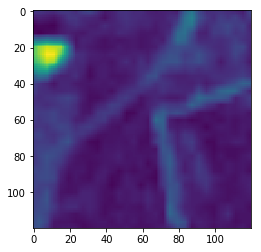


 Band 5 

Upscale
Patch extraction with stride=120 and width=120 begins for: ../DATA_GHANA/RAW_PATCHES/120_x_120/ms_hr_5.h5
Patch extraction done
9944 patches of size 120 x 120 created as list for ../DATA_GHANA/RAW_PATCHES/120_x_120/ms_hr_5.h5
File../DATA_GHANA/RAW_PATCHES/120_x_120/ms_hr_5.h5 created


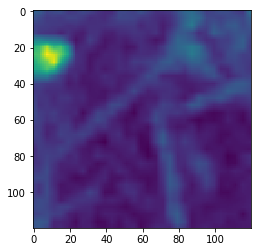


 Band 6 

Upscale
Patch extraction with stride=120 and width=120 begins for: ../DATA_GHANA/RAW_PATCHES/120_x_120/ms_hr_6.h5
Patch extraction done
9944 patches of size 120 x 120 created as list for ../DATA_GHANA/RAW_PATCHES/120_x_120/ms_hr_6.h5
File../DATA_GHANA/RAW_PATCHES/120_x_120/ms_hr_6.h5 created


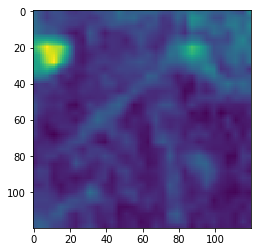


 Band 7 

Upscale
Patch extraction with stride=120 and width=120 begins for: ../DATA_GHANA/RAW_PATCHES/120_x_120/ms_hr_7.h5
Patch extraction done
9944 patches of size 120 x 120 created as list for ../DATA_GHANA/RAW_PATCHES/120_x_120/ms_hr_7.h5
File../DATA_GHANA/RAW_PATCHES/120_x_120/ms_hr_7.h5 created


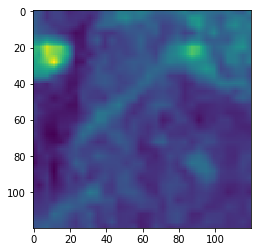


 BANDS



 Band 0 

Upscale
Patch extraction with stride=120 and width=120 begins for: ../DATA_GHANA/RAW_PATCHES/120_x_120/pansharpened_0.h5
Patch extraction done
9944 patches of size 120 x 120 created as list for ../DATA_GHANA/RAW_PATCHES/120_x_120/pansharpened_0.h5
File../DATA_GHANA/RAW_PATCHES/120_x_120/pansharpened_0.h5 created


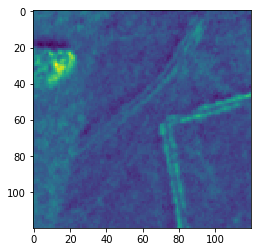


 Band 1 

Upscale
Patch extraction with stride=120 and width=120 begins for: ../DATA_GHANA/RAW_PATCHES/120_x_120/pansharpened_1.h5
Patch extraction done
9944 patches of size 120 x 120 created as list for ../DATA_GHANA/RAW_PATCHES/120_x_120/pansharpened_1.h5
File../DATA_GHANA/RAW_PATCHES/120_x_120/pansharpened_1.h5 created


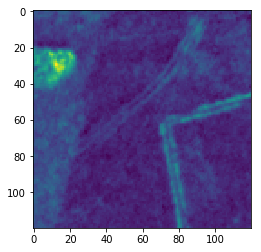


 Band 2 

Upscale
Patch extraction with stride=120 and width=120 begins for: ../DATA_GHANA/RAW_PATCHES/120_x_120/pansharpened_2.h5
Patch extraction done
9944 patches of size 120 x 120 created as list for ../DATA_GHANA/RAW_PATCHES/120_x_120/pansharpened_2.h5
File../DATA_GHANA/RAW_PATCHES/120_x_120/pansharpened_2.h5 created


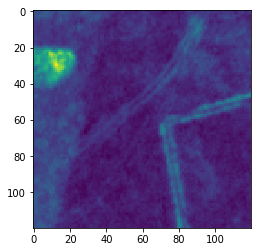


 Band 3 

Upscale
Patch extraction with stride=120 and width=120 begins for: ../DATA_GHANA/RAW_PATCHES/120_x_120/pansharpened_3.h5
Patch extraction done
9944 patches of size 120 x 120 created as list for ../DATA_GHANA/RAW_PATCHES/120_x_120/pansharpened_3.h5
File../DATA_GHANA/RAW_PATCHES/120_x_120/pansharpened_3.h5 created


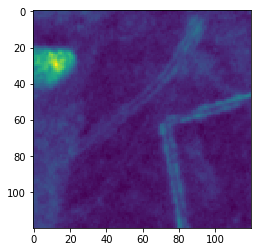


 Band 4 

Upscale
Patch extraction with stride=120 and width=120 begins for: ../DATA_GHANA/RAW_PATCHES/120_x_120/pansharpened_4.h5
Patch extraction done
9944 patches of size 120 x 120 created as list for ../DATA_GHANA/RAW_PATCHES/120_x_120/pansharpened_4.h5
File../DATA_GHANA/RAW_PATCHES/120_x_120/pansharpened_4.h5 created


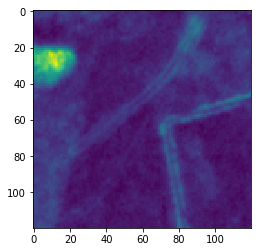


 Band 5 

Upscale
Patch extraction with stride=120 and width=120 begins for: ../DATA_GHANA/RAW_PATCHES/120_x_120/pansharpened_5.h5
Patch extraction done
9944 patches of size 120 x 120 created as list for ../DATA_GHANA/RAW_PATCHES/120_x_120/pansharpened_5.h5
File../DATA_GHANA/RAW_PATCHES/120_x_120/pansharpened_5.h5 created


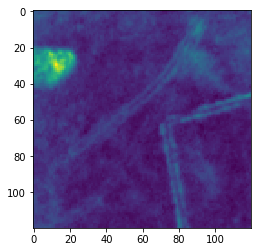


 Band 6 

Upscale
Patch extraction with stride=120 and width=120 begins for: ../DATA_GHANA/RAW_PATCHES/120_x_120/pansharpened_6.h5
Patch extraction done
9944 patches of size 120 x 120 created as list for ../DATA_GHANA/RAW_PATCHES/120_x_120/pansharpened_6.h5
File../DATA_GHANA/RAW_PATCHES/120_x_120/pansharpened_6.h5 created


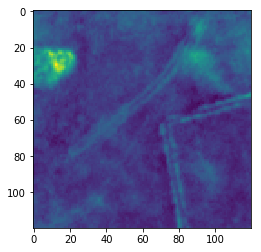


 Band 7 

Upscale
Patch extraction with stride=120 and width=120 begins for: ../DATA_GHANA/RAW_PATCHES/120_x_120/pansharpened_7.h5
Patch extraction done
9944 patches of size 120 x 120 created as list for ../DATA_GHANA/RAW_PATCHES/120_x_120/pansharpened_7.h5
File../DATA_GHANA/RAW_PATCHES/120_x_120/pansharpened_7.h5 created


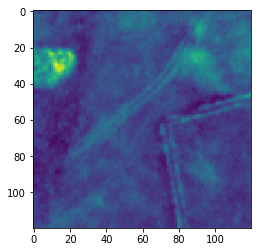


 LABELS 


Patch extraction with stride=120 and width=120 begins for: ../DATA_GHANA/RAW_PATCHES/120_x_120/groundtruth.h5
Patch extraction done
9944 patches of size 120 x 120 created as list for ../DATA_GHANA/RAW_PATCHES/120_x_120/groundtruth.h5
File../DATA_GHANA/RAW_PATCHES/120_x_120/groundtruth.h5 created


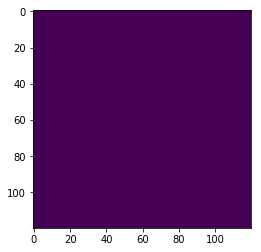

In [6]:
if __name__ == '__main__':
    path='../DATA_GHANA/RAW_DATA/'

    path_patches='../DATA_GHANA/RAW_PATCHES/120_x_120/'
    if not os.path.exists(path_patches):
            os.makedirs(path_patches)
  
    patch_test_number=300
     ## Panchromatic
    panchromatic_file=path+NAME_PANCHRO
    panchromatic=read_images(panchromatic_file)
    hr_size=panchromatic.shape
    panchromatic=panchromatic[newaxis,:,:,newaxis]
    print('\n PANCHROMATIC \n\n')
    panchromatic=extract_patches(panchromatic,WIDTH,STRIDE,path_patches+'panchro.h5')
    
    ## Find patches to discard
    keep=np.arange(len(panchromatic))
    discard=[]
    print('Original size of the dataset is %d'%len(panchromatic))
    for i in range(len(panchromatic)):
        if (np.sum(panchromatic[i,:,:,:])).astype(int)==0:
            discard.append(i)

    discard=np.asarray(discard)
    keep=np.delete(keep,discard)
    print('Final size of the dataset is %d'%len(keep))
    ## Save Panchromatic
    panchromatic=panchromatic[keep]
    save_patches(panchromatic,path_patches+'panchro.h5') 
    plt.imshow(panchromatic[patch_test_number,:,:,0])
    plt.show()
            

    ##MS bands
    
    ms_file=path+NAME_MS 
    ms=read_images(ms_file)
    ms=np.transpose(ms,(1,2,0))
    print('\n MS BANDS\n\n')
    for i in range(ms.shape[2]):
        print('\n Band %d \n'%i)
        ms_i=ms[:,:,i]
        print('Upscale')
        ms_hr=prepare_ms_hr(ms_i[newaxis,:,:,newaxis],hr_size)
        ms_hr=extract_patches(ms_hr,WIDTH,STRIDE,path_patches+'ms_hr_'+str(i)+'.h5')
        ms_hr=ms_hr[keep]
        save_patches(ms_hr,path_patches+'ms_hr_'+str(i)+'.h5')
        plt.imshow(ms_hr[patch_test_number,:,:,0])
        plt.show()

    
    ##Pansharpened bands
    
    pansharpened_file=path+NAME_PANSHARP 
    pansharpened=read_images(pansharpened_file)
    pansharpened=np.transpose(pansharpened,(1,2,0))
    print('\n BANDS\n\n')
    for i in range(pansharpened.shape[2]):
        print('\n Band %d \n'%i)
        pansharpened_i=pansharpened[:,:,i]
        print('Upscale')
        pansharpened_i=extract_patches(pansharpened_i[newaxis,:,:,newaxis],WIDTH,STRIDE,path_patches+'pansharpened_'+str(i)+'.h5')
        pansharpened_i=pansharpened_i[keep]
        save_patches(pansharpened_i,path_patches+'pansharpened_'+str(i)+'.h5')
        plt.imshow(pansharpened_i[patch_test_number,:,:,0])
        plt.show()
        
    ## Label patches
    
    labels_file=path+NAME_LABELS
    labels=read_labels(labels_file)
    labels=labels[newaxis,:,:,newaxis]
    
    print('\n LABELS \n\n')
    labels=extract_patches(labels,WIDTH,STRIDE,path_patches+'groundtruth.h5')
    labels=labels[keep]
    save_patches(labels,path_patches+'groundtruth.h5')
    plt.imshow(labels[patch_test_number,:,:,0])
    plt.show()
    
    
    